In [1]:
import numpy as np
import scipy as sc
import os
import math
import cv2
import matplotlib.pyplot as plt
import dlib
from numpy.linalg import svd, inv
from scipy.spatial import ConvexHull

np.set_printoptions(suppress=True)
%matplotlib inline

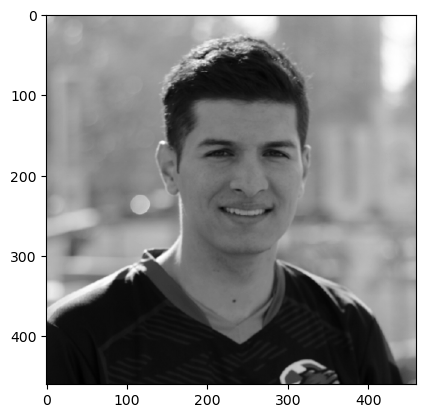

In [2]:
img1_f = 'sources/raoul.png'
img1 = cv2.cvtColor(cv2.cvtColor(cv2.imread(img1_f), cv2.COLOR_BGR2RGB), cv2.COLOR_BGR2GRAY)

plt.figure()
plt.imshow(img1, cmap='gray')

Found 1 Faces!


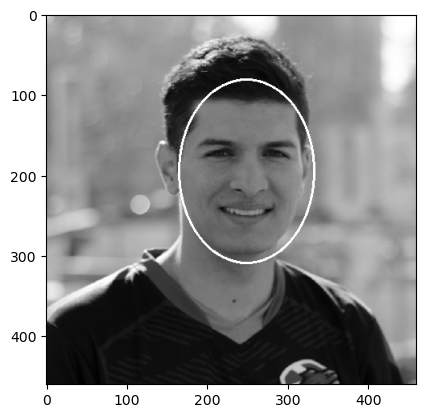

In [3]:
# https://docs.opencv.org/3.4/db/d28/tutorial_cascade_classifier.html
# https://github.com/opencv/opencv/tree/3.4/data/haarcascades
# I think we might need to add 2 more classifiers? one for the smile and the other for the eyes
# this way we can use these 3 classifiers to detect emotions? but I don't know for sure yet as we need
# to know how our data will be on the models we are downloading?
def detect_face(img1):
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
    faces = face_cascade.detectMultiScale(
            img1,
            scaleFactor=1.3,
            minNeighbors=3,
            minSize=(30, 30)
    )
    
    print("Found {0} Faces!".format(len(faces)))
    
    for (x, y, w, h) in faces:
        # cv2.rectangle(img1, (x, y), (x+w, y+h), (255, 0, 0), 2)
        cv2.ellipse(img1, (x + w//2, y + h//2), (w//2-10, h//2+20), 0, 0, 360, (255, 0, 0), 2)
        roi_img = cv2.cvtColor(cv2.imread(img1_f), cv2.COLOR_BGR2RGB)[y:y+h, x:x+w]
        
    return img1

img1 = detect_face(img1)
plt.figure()
plt.imshow(img1, cmap='gray')

## Connect to the webcam

### Notes
Based on output of chatGPT, with some modification

In [4]:



def calculate_logits(frame):
    # Dummy function for generating logits
    
    # put model prediciton result here
    # Replace this with your actual logit calculation based on the frame    
    
    # CODE TODO

    
    faces_emotions=['Happiness','Sadness','Anger','Fear','Surprise','Disgust','Contempt']
    return np.random.rand(7),faces_emotions

In [5]:

import threading
import ipywidgets as widgets
from IPython.display import display
from PIL import Image

class WebcamViewer:
    def __init__(self):
        self.cap = cv2.VideoCapture(0)
        self.output = widgets.Image(layout={'border': '1px solid black'})
        # Creating logit sliders
        self.logit_sliders = [widgets.FloatSlider(description=f'label', min=-1.0, max=1.0, value=0.0, style={'description_width': 'initial'}) for i in range(7)]
        # Single text widget to display the name of the maximum logit with large font size
        self.max_logit_label = widgets.Label(value='', layout=widgets.Layout(width='150px', margin='10px 0 0 20px', font_size='30px'))  # Set a fixed width enough to hold the longest emotion name
        # Horizontal Box for sliders and the label, with content centered
        self.logits_and_label = widgets.HBox([widgets.VBox(self.logit_sliders), widgets.VBox([self.max_logit_label])],layout=widgets.Layout(justify_content='center',align_items='center'))
        self.close_button = widgets.Button(description="Close", button_style='danger')
        self.close_button.on_click(self.on_close_button_clicked)
        # Main container VBox for overall layout with content centered
        self.container = widgets.VBox([self.output, self.logits_and_label, self.close_button],
                                      layout=widgets.Layout(justify_content='center',align_items='center'))
        self.display_container()
        self.running = True
        self.update()

    def display_container(self):
        display(self.container)

    def update(self):
        if self.running:
            ret, frame = self.cap.read()
            if ret:
                logits, faces_emotions = calculate_logits(frame)  # Calculate logits for the current frame
                max_index = np.argmax(logits)  # Find the index of the maximum logit
                # Update the label with the name of the max logit
                self.max_logit_label.value = f'{faces_emotions[max_index]}'

                for i, slider in enumerate(self.logit_sliders):
                    slider.description = faces_emotions[i]
                    slider.value = logits[i]  # Update sliders with new logits

                # Convert the image format from OpenCV BGR to PIL format
                frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

                frame = detect_face(frame)

                
                img = Image.fromarray(frame)
                # Convert PIL image to byte array
                img_byte_arr = img._repr_png_()



                
                self.output.value = img_byte_arr
            # Call update again after a short delay
            threading.Timer(0.05, self.update).start()

    def on_close_button_clicked(self, b):
        self.running = False
        self.cap.release()
        self.container.close()

# Create and display the webcam viewer
webcam_viewer = WebcamViewer()


Found 1 Faces!
